In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_parquet("green_trip_data.parquet", engine = "fastparquet")

In [94]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0


In [95]:
df.size

1014846

In [96]:
df.shape

(48326, 21)

In [97]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        1836
RatecodeID                1836
PULocationID                 0
DOLocationID                 0
passenger_count           1836
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                48326
improvement_surcharge        0
total_amount                 0
payment_type              1836
trip_type                 1843
congestion_surcharge      1836
cbd_congestion_fee        1836
dtype: int64

In [98]:
# temp = pd.to_datetime(df["lpep_pickup_datetime"], format = "%d/%m/%Y").dt.date
# temp = pd.to_datetime(df["lpep_pickup_datetime"], format = "%d/%m/%Y").dt.day
# temp = pd.to_datetime(df["lpep_pickup_datetime"], format = "%d/%m/%Y").dt.month
# temp = pd.to_datetime(df["lpep_pickup_datetime"], format = "%d/%m/%Y").dt.year

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48326 entries, 0 to 48325
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               48326 non-null  int32         
 1   lpep_pickup_datetime   48326 non-null  datetime64[us]
 2   lpep_dropoff_datetime  48326 non-null  datetime64[us]
 3   store_and_fwd_flag     46490 non-null  object        
 4   RatecodeID             46490 non-null  float64       
 5   PULocationID           48326 non-null  int32         
 6   DOLocationID           48326 non-null  int32         
 7   passenger_count        46490 non-null  float64       
 8   trip_distance          48326 non-null  float64       
 9   fare_amount            48326 non-null  float64       
 10  extra                  48326 non-null  float64       
 11  mta_tax                48326 non-null  float64       
 12  tip_amount             48326 non-null  float64       
 13  t

In [100]:
df["Duration"] = df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]

In [101]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,Duration
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0,0 days 00:14:11
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0,0 days 00:05:53
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0,0 days 00:01:52
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0,0 days 00:15:28
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0,0 days 00:36:05


In [102]:
df.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,Duration
48321,2,2025-01-31 19:36:00,2025-01-31 20:05:00,None,NaN,179,132,NaN,13.99,55.61,...,11.42,0.00,NaN,1.0,68.53,NaN,NaN,NaN,NaN,0 days 00:29:00
48322,2,2025-01-31 20:33:00,2025-01-31 20:41:00,None,NaN,166,75,NaN,1.51,13.58,...,2.26,0.00,NaN,1.0,17.34,NaN,NaN,NaN,NaN,0 days 00:08:00
48323,2,2025-01-31 21:09:00,2025-01-31 21:30:00,None,NaN,41,42,NaN,2.90,30.89,...,0.00,0.00,NaN,1.0,32.39,NaN,NaN,NaN,NaN,0 days 00:21:00
48324,2,2025-01-31 22:22:00,2025-01-31 22:25:00,None,NaN,75,43,NaN,0.34,14.78,...,2.44,0.00,NaN,1.0,18.72,NaN,NaN,NaN,NaN,0 days 00:03:00
48325,2,2025-01-31 22:15:00,2025-01-31 22:22:00,None,NaN,42,194,NaN,1.37,66.67,...,10.00,6.94,NaN,1.0,85.11,NaN,NaN,NaN,NaN,0 days 00:07:00


In [103]:
def toMins(x):
    x = str(x).split()[-1].split(":")
    x = [int(num) for num in x]
    ans = 0
    if x[0] > 0:
        ans += 60*x[0]
    ans += x[1]

    return ans

In [104]:
df["Duration"] = df["Duration"].apply(lambda x: toMins(x))

In [105]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,Duration
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0,14
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0,5
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0,1
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0,15
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0,36


In [106]:
day_count = pd.DataFrame(sorted(df["lpep_pickup_datetime"].dt.day.value_counts()))
day_count["day"] = [x+1 for x in day_count.index]
day_count = day_count.rename(columns = {0: "freq"})

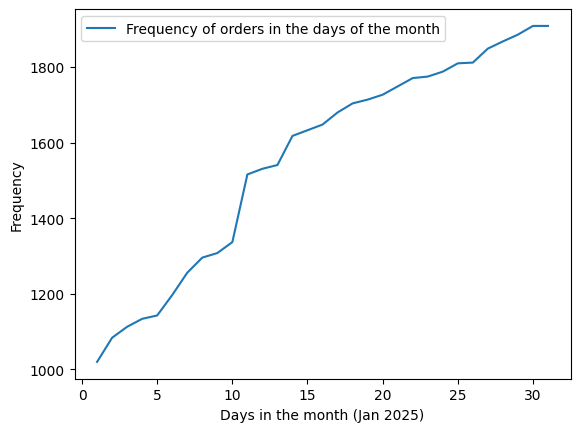

In [107]:
plt.plot(day_count["day"], day_count["freq"], label = "Frequency of orders in the days of the month")

plt.legend()
plt.xlabel("Days in the month (Jan 2025)")
plt.ylabel("Frequency")
plt.show()

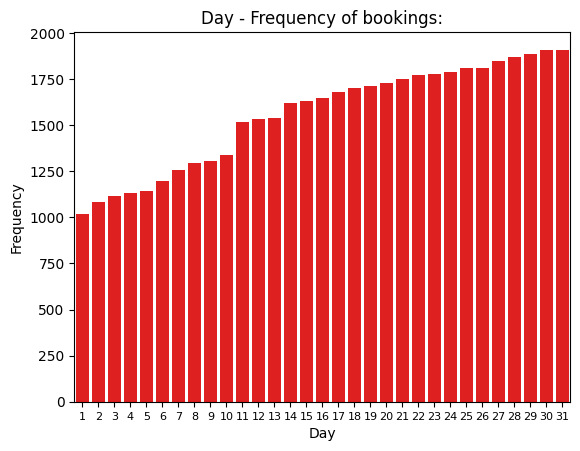

In [108]:
sns.barplot(data = day_count, x = "day", y = "freq", color = "red")

plt.xlabel("Day")
plt.ylabel("Frequency")
plt.title("Day - Frequency of bookings:")

plt.xticks(fontsize = 8)
plt.show()

In [109]:
df["Duration"].describe(percentiles = [0.90, 0.95, 0.98, 0.99])

count    48326.000000
mean        19.489116
std         93.920757
min          0.000000
50%         11.000000
90%         25.000000
95%         32.000000
98%         44.000000
99%         61.750000
max       1439.000000
Name: Duration, dtype: float64

In [110]:
df[df["Duration"] == 0]["Duration"].count()

1507

In [111]:
df = df[(df["Duration"] >= 1) & (df["Duration"] <= 60)] # -> 95% of the dataset

In [112]:
# Important Feature's Imformation

# Target: Duration
# Model: Regression Model
# Independent features: trip_distance, total_amount, PULocationID, DOLocationID, time_sin, time_cos

In [113]:
df["hour"] = df["lpep_pickup_datetime"].dt.hour
df["minute"] = df["lpep_pickup_datetime"].dt.minute
df["time_numeric"] = df["hour"] + df["minute"] / 60

In [114]:
df["time_sin"] = np.sin(2 * np.pi * df["time_numeric"] / 24)
df["time_cos"] = np.cos(2 * np.pi * df["time_numeric"] / 24)

In [115]:
print("Unique PULocId:", len(df["PULocationID"].unique()))
print("Unique DOLocId:", len(df["DOLocationID"].unique()))

Unique PULocId: 208
Unique DOLocId: 240


In [116]:
cat = ["PULocationID", "DOLocationID"]
num = ["time_sin", "time_cos", "trip_distance", "total_amount"]

df = df[cat + num + ["Duration"]]

In [117]:
df.isna().sum()

PULocationID     0
DOLocationID     0
time_sin         0
time_cos         0
trip_distance    0
total_amount     0
Duration         0
dtype: int64

In [118]:
X = df.drop("Duration", axis = 1)
y = df["Duration"]

In [119]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [120]:
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), cat),
    ("num", StandardScaler(), num)
])

In [121]:
lin_mod = Pipeline([
    ("preprocessing", preprocess),
    ("model", LinearRegression())
])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [123]:
lin_mod.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [124]:
print("Training Score:", lin_mod.score(X_train, y_train))
print("Testing Score:", lin_mod.score(X_test, y_test))

Training Score: 0.7300727522373056
Testing Score: 0.6954915591790558


In [125]:
lin_mod.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('cat',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['PULocationID', 'DOLocationID']),
                                   ('num', StandardScaler(),
                                    ['time_sin', 'time_cos', 'trip_distance',
                                     'total_amount'])])),
  ('model', LinearRegression())],
 'transform_input': None,
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('cat',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['PULocationID', 'DOLocationID']),
                                 ('num', StandardScaler(),
                                  ['time_sin', 'time_cos', 'trip_distance',
            

In [126]:
params =  {
             'model__copy_X': True,
             'model__fit_intercept': True,
             'model__n_jobs': None,
             'model__positive': False
          }

In [127]:
# Independent features: trip_distance, total_amount, PULocationID, DOLocationID, time_sin, time_cos

sample_test = pd.DataFrame({
    "trip_distance": [180],
    "total_amount": [250],
    "PULocationID": [70],
    "DOLocationID": [160],
    "time_sin": [np.sin(2 * np.pi * 4/24)],
    "time_cos": [np.cos(2 * np.pi * 4/24)]    
})

sample_test = sample_test.astype("float64")

In [128]:
import mlflow

In [141]:
# Convert features to float64 everywhere
X_train_fixed = X_train.astype("float64")
X_test_fixed = X_test.astype("float64")
sample_test_fixed = sample_test.astype("float64")

# (Optional) Also cast y to float if it's int
y_train_fixed = y_train.astype("float64")
y_test_fixed = y_test.astype("float64")

# Refit the model on float64 data (important!)
lin_mod.fit(X_train_fixed, y_train_fixed)

mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Duration Prediction Model v1")

with mlflow.start_run(run_name="Duration Prediction Model - LR"):
    # Log parameters
    mlflow.log_params(params)

    # Log metrics
    mlflow.log_metrics({
        "r2_score": r2_score(y_test_fixed, lin_mod.predict(X_test_fixed)),
        "MSE" : mean_squared_error(y_test_fixed, lin_mod.predict(X_test_fixed)),
        "RMSE" : np.sqrt(mean_squared_error(y_test_fixed, lin_mod.predict(X_test_fixed)))
    })

    # Infer signature from float data
    signature = mlflow.models.infer_signature(
        X_test_fixed,
        lin_mod.predict(X_test_fixed)
    )

    # Log the model
    mlflow.sklearn.log_model(
        sk_model=lin_mod,
        artifact_path="LR model",
        input_example=sample_test_fixed,
        signature=signature
    )

    # Adding artifacts
    mlflow.log_artifact("green_trip_data.parquet", artifact_path="dataset")


2025/08/24 09:09:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Duration Prediction Model - LR at: http://127.0.0.1:5000/#/experiments/886002771329622691/runs/f7473cefb29f4f31aab40e433d97b0fc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/886002771329622691


# Creating XGBoost Model

In [130]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [131]:
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), cat)
])

In [132]:
xgb_mod = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor())
])

xgb_mod.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [143]:
import mlflow
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Set up MLflow tracking
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Duration Prediction Model v1")

with mlflow.start_run(run_name="Duration Prediction Model - XGBR"):

    # Log pipeline parameters
    mlflow.log_params(xgb_mod.get_params(deep=True))

    # Predict and log metrics
    y_pred = xgb_mod.predict(X_test)
    mlflow.log_metrics({
        "r2_score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

    # Infer model signature
    signature = mlflow.models.infer_signature(X_test, y_pred)

    # Log the full pipeline (preprocessing + model)
    mlflow.sklearn.log_model(
        sk_model=xgb_mod,
        artifact_path="XGBR_pipeline",
        input_example=sample_test,
        signature=signature
    )

    # Log dataset as artifact
    mlflow.log_artifact("green_trip_data.parquet", artifact_path="dataset")


/usr/local/python/3.12.1/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/24 09:44:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Duration Prediction Model - XGBR at: http://127.0.0.1:5000/#/experiments/886002771329622691/runs/0a3f877157974818a083ed5eebf8c21b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/886002771329622691


In [138]:
print("Training Score:", xgb_mod.score(X_train, y_train))
print("Testing Score:", xgb_mod.score(X_test, y_test))

Training Score: 0.5127731561660767
Testing Score: 0.4499104619026184


In [139]:
xgb_mod.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('cat',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['PULocationID', 'DOLocationID'])])),
  ('model',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=

In [ ]:
# joblib.dump(lin_mod, "Duration_Calculation_model.pkl")

# Loading a model with the model_id

In [209]:
# Loading the model from mlflow using uri = "models:/{model_id}"

logged_model = "models:/m-a22bf11ab1884735a743dedf720cc6b5"
loaded_model = mlflow.pyfunc.load_model(logged_model)
pred_vals = loaded_model.predict(X_test_fixed)
print("r2_score:", r2_score(y_test_fixed, pred_vals))

r2_score: 0.6954915591790558


In [171]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
rfr_mod = RandomForestRegressor(
        n_estimators=100,       # Number of trees
        max_depth=None,         # Let trees grow until pure
        random_state=42,        # For reproducibility
        n_jobs=-1
)

In [173]:
rfr_mod.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [174]:
print("Training Score:", rfr_mod.score(X_train, y_train))
print("Testing Score:", rfr_mod.score(X_test, y_test))

Training Score: 0.9761273906297773
Testing Score: 0.8297020828478423


In [188]:
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Duration Prediction Model v1")

with mlflow.start_run(run_name = "Duration Prediction Model - RFR"):

    mlflow.log_params(rfr_mod.get_params())

    pred_val = rfr_mod.predict(X_test)
    mlflow.log_metrics({
        "r2_score": r2_score(y_test, pred_val),
        "MSE": mean_squared_error(y_test, pred_val),
        "RMSE": np.sqrt(mean_squared_error(y_test, pred_val))
    })

    signature = mlflow.models.infer_signature(X_test, pred_vals)

    mlflow.sklearn.log_model(rfr_mod,
                             artifact_path = "random_forest_model",
                             input_example = sample_test,
                             signature = signature
                            )

    mlflow.log_artifact("green_trip_data.parquet", artifact_path = "dataset")

/usr/local/python/3.12.1/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/08/24 11:14:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Duration Prediction Model - RFR at: http://127.0.0.1:5000/#/experiments/886002771329622691/runs/765335c2a909433b98214f259fcf0e45
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/886002771329622691


# MlflowClient

## Manipulating Registered Model

In [200]:
from mlflow import MlflowClient

In [208]:
client = MlflowClient()

# setting alias 
client.set_registered_model_alias("Duration Prediction Model", "champion", 1)
client.set_registered_model_alias("Duration Prediction Model", "challenger", 2)
client.set_registered_model_alias("Duration Prediction Model", "challenger", 3)

# deleting alias
client.delete_registered_model_alias("Duration Prediction Model", "challenger")

# setting tag for a model
client.set_registered_model_tag("Duration Prediction Model", "performance", "best")

# deleting tag for a model
client.delete_registered_model_tag("Duration Prediction Model", "performance")

# setting tag for a version in a model
client.set_model_version_tag(name = "Duration Prediction Model",
                             version = "3",
                             key = "performance",
                             value = "poor"
                            )

# deleting tag for a version in a model
client.delete_model_version_tag(name = "Duration Prediction Model",
                                version = "3",
                                key = "performance"
)

## Loading Registered Model

In [202]:
model_name = "Duration Prediction Model"
model_alias = "champion"

loaded_model = mlflow.pyfunc.load_model(f"models:/{model_name}@{model_alias}")
loaded_model.predict(X_test)

array([ 3.47,  6.78, 23.06, ...,  7.31, 18.73,  9.01])